In [ ]:
pip install yfinance 

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline   

%matplotlib inline facilitaes plotting matplotlib graphs just below code cell and store then in the notebook documents

In [26]:
yf.pdr_override()

In [27]:
assets = ['GOOGL','WMT','BP']
pf_data = pd.DataFrame()
for a in assets:
  pf_data[a]=wb.DataReader(a, start= 2010-1-1)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
pf_data.tail()

,GOOGL,WMT,BP
Date,,,
2022-12-16,90.260002,142.750000,33.680000
2022-12-19,88.440002,142.800003,33.950001
2022-12-20,89.019997,144.050003,34.080002
2022-12-21,89.580002,145.179993,35.029999
2022-12-22,87.230003,142.679993,34.430000


Normalizing

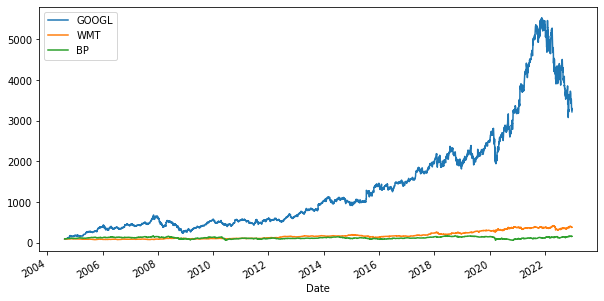

In [29]:
(pf_data/pf_data.iloc[1]*100).plot(figsize=(10,5))

In [30]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [31]:
log_returns.mean()*250

GOOGL    0.192025
WMT      0.072480
BP       0.026136
dtype: float64

In [32]:
log_returns.cov()*250

,GOOGL,WMT,BP
GOOGL,0.092704,0.018859,0.033273
WMT,0.018859,0.040884,0.014851
BP,0.033273,0.014851,0.096609


In [33]:
log_returns.corr()

,GOOGL,WMT,BP
GOOGL,1.000000,0.306329,0.351592
WMT,0.306329,1.000000,0.236310
BP,0.351592,0.236310,1.000000


\now we need to find out random weight equal to one (1) comprising the two assets.

In [34]:
num_asset = len(assets)
num_asset

3

In [35]:
arr = np.random.random(2)

In [36]:
arr

array([0.03041029, 0.00028207])

In [37]:
arr[0]+arr[1]

0.030692364256410976

You see! the sum of two random number is not equal 1. so we need following trick

In [38]:
weights =np.random.random(num_asset)
weights/= np.sum(weights)
weights

array([0.43626685, 0.23815502, 0.32557813])

In [48]:
weights[0]+weights[1]+weights[2]

1.0

Expected portfolio return

In [40]:
np.sum(weights*log_returns.mean())*250 

0.10954509145851707

Expected portfolio Variance

In [41]:
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.045877829474247886

Expected portfolio Volatility

In [42]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.21419110503064287

1000 time simulation

In [ ]:
pf_return = []
pf_volatility = []

for x in range(1000):
  weights = np.random.random(num_asset)
  weights/= np.sum(weights)
  pf_return.append(np.sum(weights*log_returns.mean())*250)
  pf_volatility.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))

pf_return = np.array(pf_return)
pf_volatility = np.array(pf_volatility)

pf_return,pf_volatility

Makeing the list as numpy array

#Making DataFrame Object called Portfolios
-- It comprises of "Return" and "Volatility" column

In [44]:
portfolios = pd.DataFrame({'Return':pf_return, 'Volatility': pf_volatility})

In [45]:
portfolios.head()

,Return,Volatility
0,0.078753,0.181127
1,0.100916,0.200552
2,0.059577,0.188398
3,0.116488,0.195754
4,0.131089,0.219877


In [46]:
portfolios.tail()

,Return,Volatility
995,0.128232,0.203956
996,0.079576,0.185351
997,0.068861,0.205324
998,0.098752,0.186659
999,0.104496,0.198243


Text(0, 0.5, 'Expected Return')

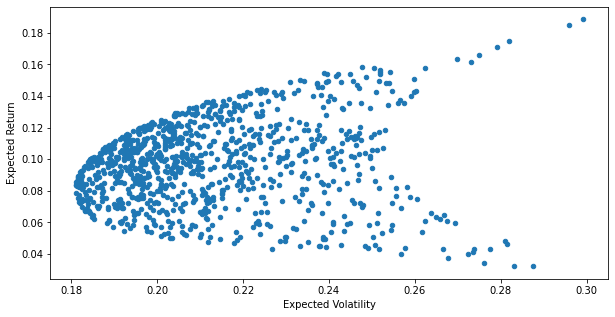

In [49]:
portfolios.plot(x='Volatility',y= 'Return',kind = 'scatter', figsize= (10,5));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
